In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [2]:
model = pybamm.lithium_ion.DFN(options={"thermal": "lumped"})
param = pybamm.ParameterValues("OKane2023")
param.update({"Ambient temperature [K]": 298.15})
param.update({"Initial temperature [K]": 298.15})
param.update({"Maximum concentration in negative electrode [mol.m-3]": 32544})
param.update({"Maximum concentration in positive electrode [mol.m-3]": 56598})
param.update({"Initial concentration in negative electrode [mol.m-3]": 28162})
param.update({"Initial concentration in positive electrode [mol.m-3]": 15281})

exp = pybamm.Experiment(["Discharge at 1C until 2.5 V"])

pts100 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 100,  # positive particle
}

sim100 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts100)
solution100 = sim100.solve(calc_esoh=False)

In [ ]:
t = solution100["Time [s]"].entries
V = solution100["Terminal voltage [V]"].entries
plt.figure()
plt.plot(t,V)
plt.xlabel("Time [s]")
plt.ylabel("Terminal voltage [V]")
plt.show()

In [3]:
r_n = solution100["r_n"].entries[:,0,0]

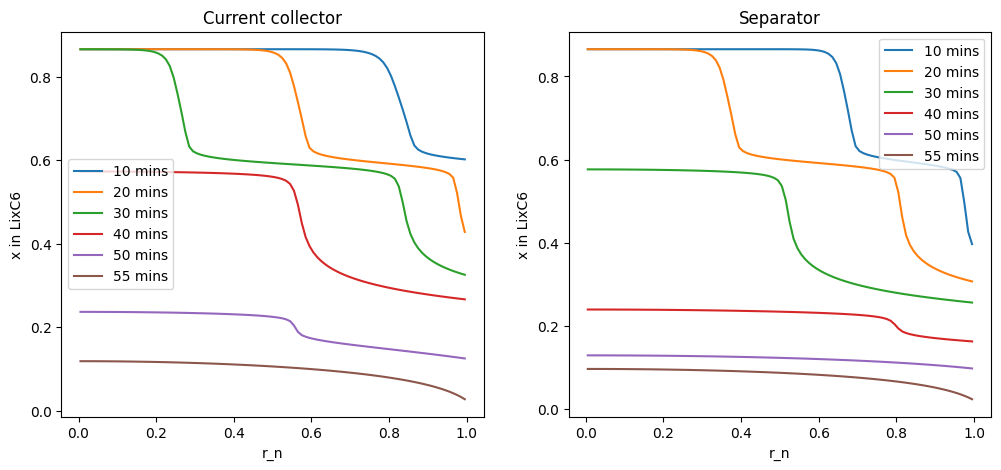

In [4]:
c10_CC = solution100["Negative particle concentration"].entries[:,0,10]
c20_CC = solution100["Negative particle concentration"].entries[:,0,20]
c30_CC = solution100["Negative particle concentration"].entries[:,0,30]
c40_CC = solution100["Negative particle concentration"].entries[:,0,40]
c50_CC = solution100["Negative particle concentration"].entries[:,0,50]
c55_CC = solution100["Negative particle concentration"].entries[:,0,55]
c10_sep = solution100["Negative particle concentration"].entries[:,-1,10]
c20_sep = solution100["Negative particle concentration"].entries[:,-1,20]
c30_sep = solution100["Negative particle concentration"].entries[:,-1,30]
c40_sep = solution100["Negative particle concentration"].entries[:,-1,40]
c50_sep = solution100["Negative particle concentration"].entries[:,-1,50]
c55_sep = solution100["Negative particle concentration"].entries[:,-1,55]
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(r_n,c10_CC,label="10 mins")
ax1.plot(r_n,c20_CC,label="20 mins")
ax1.plot(r_n,c30_CC,label="30 mins")
ax1.plot(r_n,c40_CC,label="40 mins")
ax1.plot(r_n,c50_CC,label="50 mins")
ax1.plot(r_n,c55_CC,label="55 mins")
ax1.set_xlabel("r_n")
ax1.set_ylabel("x in LixC6")
ax1.set_title("Current collector")
ax1.legend()
ax2.plot(r_n,c10_sep,label="10 mins")
ax2.plot(r_n,c20_sep,label="20 mins")
ax2.plot(r_n,c30_sep,label="30 mins")
ax2.plot(r_n,c40_sep,label="40 mins")
ax2.plot(r_n,c50_sep,label="50 mins")
ax2.plot(r_n,c55_sep,label="55 mins")
ax2.set_xlabel("r_n")
ax2.set_ylabel("x in LixC6")
ax2.set_title("Separator")
ax2.legend()
plt.savefig("/mnt/c/Users/sokane/pybamm_data/mesh_refinement/c_vs_r_100points.pdf")
plt.show()